# **Exploratory Data Analysis for Advertising Campaign Metrics**

This notebook contains an exploratory data analysis (EDA) of advertising campaign performance metrics. The goal of this analysis is to uncover trends, relationships, and insights that can help optimize campaign strategies and improve performance.

### **Objectives**
1. Analyze KPIs:
2. Examine demographic-based performance:
   - Age and gender distributions
   - Call-to-action effectiveness
3. Identify relationships between cost, engagement, and reach metrics.
4. Detect potential data issues, such as missing values and address them for accurate analysis.

### **Data Columns Overview**
- **Age**: Age range of the audience targeted.
- **Gender**: Gender of the audience targeted.
- **Call to action**: Type of call-to-action used in the campaign.
- **Post engagements**: Number of engagements (likes, shares, comments) with the post.
- **CPM (cost per 1,000 impressions)**: Average cost per 1,000 impressions.
- **Cost per post engagement**: Cost incurred per post engagement.
- **Reach**: Number of unique users reached by the campaign.
- **Impressions**: Total number of times the ad was displayed.
- **Frequency**: Average number of times a user saw the ad.
- **Link clicks**: Number of clicks on the links in the ad.
- **CPC (cost per link click)**: Average cost per link click.
- **CTR (click-through rate)**: Percentage of impressions that resulted in clicks.

### **Structure of the Notebook**
1. **Data Overview**: Load and explore the dataset.
2. **Handling Missing Values**: Identify and address missing data.
3. **Descriptive Statistics**: Summarize key metrics.
4. **Visualizations**: Use various charts to reveal trends and relationships.
5. **Insights and Recommendations**: Summarize findings and actionable recommendations for campaign optimization.

### **Importing Libraries**

First we import the essential libraries required for data analysis and visualization:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Loading the Dataset**

Next, we load the dataset into a Pandas DataFrame for analysis:

In [2]:
# Specify the file path
file_path = "data/link_ctr_data_2.csv"

# Read the CSV file
df = pd.read_csv(file_path, header=0)

In [3]:
#See the first 5 rows of data
df.head()

,Age,Gender,Call to action,Post engagements,"CPM (cost per 1,000 impressions)",Cost per post engagement,Reach,Impressions,Frequency,Link clicks,CPC (cost per link click),CTR (link click-through rate)
0,18-24,female,GET_DIRECTIONS,3056.0,2.607080,0.020838,9014,24426,2.709785,33.0,1.929713,0.135102
1,18-24,female,GET_DIRECTIONS,1549.0,3.006896,0.016611,3404,8557,2.513807,3.0,8.576670,0.035059
2,18-24,female,GET_DIRECTIONS,720.0,3.127155,0.015988,1534,3681,2.399609,3.0,3.837019,0.081500
3,18-24,female,INSTAGRAM_MESSAGE,610.0,5.987626,0.038134,450,3885,8.633333,17.0,1.368349,0.437580
4,18-24,female,BOOK_TRAVEL,525.0,5.784841,0.041739,753,3788,5.030544,20.0,1.095649,0.527983


### **Evaluating Missing Data**

In this cell, we check for missing values in the dataset:

1. **`df.isnull()`**:
   - This method generates a DataFrame of the same shape as `df` with `True` for missing (NaN) values and `False` for non-missing values.

2. **Store the Result**:
   - The result is stored in a new DataFrame named `missing_data`. Each `True` value indicates a missing value in the corresponding cell of `df`.

3. **`missing_data.head(20)`**:
   - Displays the first 20 rows of the `missing_data` DataFrame.
   - This allows us to inspect the initial rows of the dataset and identify which columns and rows have missing values.

### **Why This Step is Important**:
- Identifying missing data is a crucial step in Exploratory Data Analysis (EDA). Handling missing values appropriately ensures the quality and accuracy of subsequent analyses and visualizations.


In [4]:
#Evaluating for missing data
missing_data = df.isnull()
missing_data.head(20)

,Age,Gender,Call to action,Post engagements,"CPM (cost per 1,000 impressions)",Cost per post engagement,Reach,Impressions,Frequency,Link clicks,CPC (cost per link click),CTR (link click-through rate)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,True,True
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


### **Counting Missing Values in Each Column**

We now calculate the count of missing (`True`) and non-missing (`False`) values for each column in the dataset. This will provide us witha clear overview of which columns contain missing values and how many are missing.


In [5]:
#Count missing values in each column¶
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Age
Age
False    140
Name: count, dtype: int64

Gender
Gender
False    140
Name: count, dtype: int64

Call to action
Call to action
False    140
Name: count, dtype: int64

Post engagements
Post engagements
False    131
True       9
Name: count, dtype: int64

CPM (cost per 1,000 impressions)
CPM (cost per 1,000 impressions)
False    140
Name: count, dtype: int64

Cost per post engagement
Cost per post engagement
False    131
True       9
Name: count, dtype: int64

Reach
Reach
False    140
Name: count, dtype: int64

Impressions
Impressions
False    140
Name: count, dtype: int64

Frequency
Frequency
False    140
Name: count, dtype: int64

Link clicks
Link clicks
False    90
True     50
Name: count, dtype: int64

CPC (cost per link click)
CPC (cost per link click)
False    90
True     50
Name: count, dtype: int64

CTR (link click-through rate)
CTR (link click-through rate)
False    90
True     50
Name: count, dtype: int64



### **Handling Missing Data**

In this cell, we address missing values in specific columns by filling them with `0`. Afterward, we verify that there are no remaining missing values. This step ensures the dataset is clean and ready for further analysis.

#### **Why Replace with `0`?**
- For metrics like `"Post engagements"` and `"Link clicks"`, missing values (`NaN`) can logically indicate no activity or cost, making `0` an appropriate replacement.
- For cost-related columns (e.g., `"Cost per post engagement"`, `"CPC (cost per link click)"`), replacing missing values with `0` ensures consistency, but additional care is taken:
  - Rows with `0` cost will be omitted where appropriate during analysis to avoid misinterpretation.
  - A `0` cost may falsely indicate good performance (e.g., very high efficiency), which could be misleading.

#### **Verification**:
- After handling missing values, we verify that all columns are free of `NaN` by recalculating missing values and displaying counts for each column.

This approach balances data completeness and analytical accuracy, ensuring that missing values are handled appropriately based on the context of each metric.

In [6]:
#Handle missing data
df["Post engagements"] = df["Post engagements"].fillna(0)
df["Link clicks"] = df["Link clicks"].fillna(0)
df["Cost per post engagement"] = df["Cost per post engagement"].fillna(0)
df["CTR (link click-through rate)"] = df["CTR (link click-through rate)"].fillna(0)
df["CPC (cost per link click)"] = df["CPC (cost per link click)"].fillna(0)
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Age
Age
False    140
Name: count, dtype: int64

Gender
Gender
False    140
Name: count, dtype: int64

Call to action
Call to action
False    140
Name: count, dtype: int64

Post engagements
Post engagements
False    140
Name: count, dtype: int64

CPM (cost per 1,000 impressions)
CPM (cost per 1,000 impressions)
False    140
Name: count, dtype: int64

Cost per post engagement
Cost per post engagement
False    140
Name: count, dtype: int64

Reach
Reach
False    140
Name: count, dtype: int64

Impressions
Impressions
False    140
Name: count, dtype: int64

Frequency
Frequency
False    140
Name: count, dtype: int64

Link clicks
Link clicks
False    140
Name: count, dtype: int64

CPC (cost per link click)
CPC (cost per link click)
False    140
Name: count, dtype: int64

CTR (link click-through rate)
CTR (link click-through rate)
False    140
Name: count, dtype: int64



In [7]:
#Confirm dtypes are correct for each column
df.dtypes

Age                                  object
Gender                               object
Call to action                       object
Post engagements                    float64
CPM (cost per 1,000 impressions)    float64
Cost per post engagement            float64
Reach                                 int64
Impressions                           int64
Frequency                           float64
Link clicks                         float64
CPC (cost per link click)           float64
CTR (link click-through rate)       float64
dtype: object

### **Getting an Overview of Key Metrics**

We now generate a summary of key statistics for the dataset while excluding specific columns where zeros could bias the results.

In [54]:
#Get an overview of key metrics

# Exclude specific columns where values with Zero could bias the data
df_exclude = df.drop(columns=["Cost per post engagement", "CPC (cost per link click)", "CPM (cost per 1,000 impressions)",])
df_exclude.describe()

,Post engagements,Reach,Impressions,Frequency,Link clicks,CTR (link click-through rate)
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,1214.235714,2959.814286,8396.900000,2.945653,18.028571,0.332803
std,1848.866760,4643.318397,13273.584082,2.018578,33.071525,0.559803
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,19.750000,43.000000,132.750000,1.559247,0.000000,0.000000
50%,86.500000,777.500000,1453.000000,2.587509,2.500000,0.061441
75%,2464.250000,4463.000000,12142.500000,3.582576,17.250000,0.434592
max,6674.000000,23590.000000,65850.000000,12.106897,175.000000,2.777778


### **Separating Data with No Post Engagements**

In this cell, we filter the dataset to exclude rows with zero values in `"Post engagements"` to avoid biasing cost-related visualizations or analyses.

#### **Why Filter Out Rows with Zero `Cost per post engagement`?**

- **Relevance of Data**:
  - **`Cost per post engagement`** is a key metric that includes all types of engagement (likes, shares, comments, clicks). Rows where this value is zero naturally indicate no engagement, which also means **`CPC (cost per link click)`** and other cost metrics would be zero as well. Including these rows would add no meaningful information and could distort the analysis.
  
- **Handling Zero `CPC` Rows**:
  - By filtering out rows where `Cost per post engagement = 0`, we simultaneously exclude rows where `CPC = 0` because rows with no engagement cannot have a valid cost for clicks.
  - However, we **retain rows where `Cost per post engagement > 0`, even if `CPC = 0`**, as this scenario indicates that there was some engagement (e.g., likes or shares), but none of it came from clicks. These rows are still meaningful and relevant to understanding campaign performance.



In [66]:
#Separating data with no post engagagements

# Rows with no post engagements
df_excl_zero_engagement = df[df["Cost per post engagement"] > 0]

### **Examining Cost-Related Metrics Separately**

Let's now focus on summarizing key statistics for cost-related metrics (`"Cost per post engagement"`, `"CPC (cost per link click)"`, and `"CPM (cost per 1,000 impressions)"`). To ensure accurate results, we filter out rows where `"Cost per post engagement"` is `0`, as such values could indicate missing or invalid data.


In [69]:
#Examining cost-related metrics separately
# Filter rows where cost is over 0
df_cost_metrics = df_excl_zero_engagement[["Cost per post engagement", "CPC (cost per link click)", "CPM (cost per 1,000 impressions)"]]
df_cost_metrics.describe()

,Cost per post engagement,CPC (cost per link click),"CPM (cost per 1,000 impressions)"
count,129.000000,129.000000,129.000000
mean,0.201215,1.955912,5.620860
std,0.782561,2.531442,5.393443
min,0.009729,0.000000,1.890423
25%,0.018681,0.000000,2.958492
50%,0.027613,1.015749,3.327191
75%,0.038796,2.691243,6.970981
max,8.183642,12.520273,51.264522


### **Correlation Analysis (Filtered by Cost per Engagement)**

In this cell, we compute the correlation matrix for numeric variables, focusing only on rows where **`Cost per post engagement`** is greater than zero. We then visualize the relationships between these numeric variables using a heatmap.

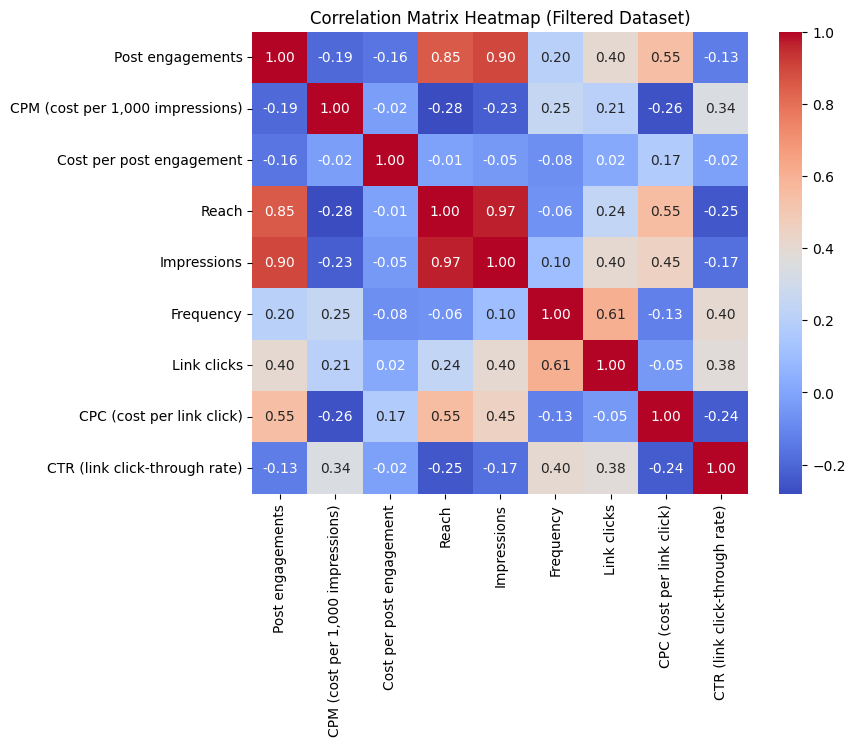

In [70]:
# Select only numeric columns for correlation
numeric_df = df_excl_zero_engagement.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap (Filtered Dataset)")
plt.show()

### **CTR Analysis by Age and Gender**

In this cell, we analyze the **Click-Through Rate (CTR)** across different age groups and genders. The goal is to uncover demographic trends in campaign performance by examining how CTR varies with these factors.

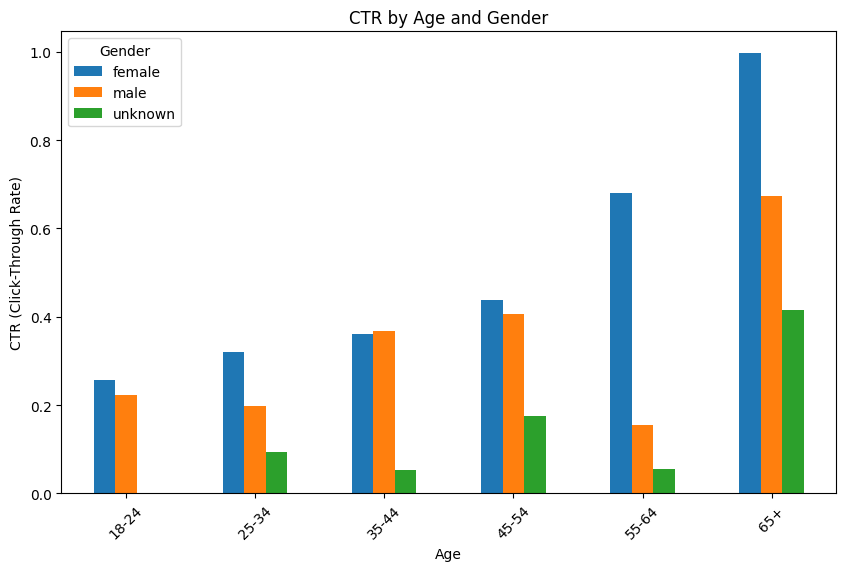

In [10]:
# Group by Age and Gender to calculate mean CTR
ctr_by_age_gender = df.groupby(["Age", "Gender"])["CTR (link click-through rate)"].mean().unstack()

# Plot as a bar chart
ctr_by_age_gender.plot(kind="bar", figsize=(10, 6))
plt.title("CTR by Age and Gender")
plt.xlabel("Age")
plt.ylabel("CTR (Click-Through Rate)")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

From the chart, it is evident that females consistently have the highest CTR across all age groups, with the 65+ demographic showing the most significant engagement, while males and unknown genders show comparatively lower engagement rates across most age ranges.

### **Cost per Engagement Analysis by Age and Gender**

In this cell, we analyze the **Cost per Engagement** across different age groups and genders. The objective is to identify demographic trends in engagement costs to better understand the efficiency of ad spending across target audiences.

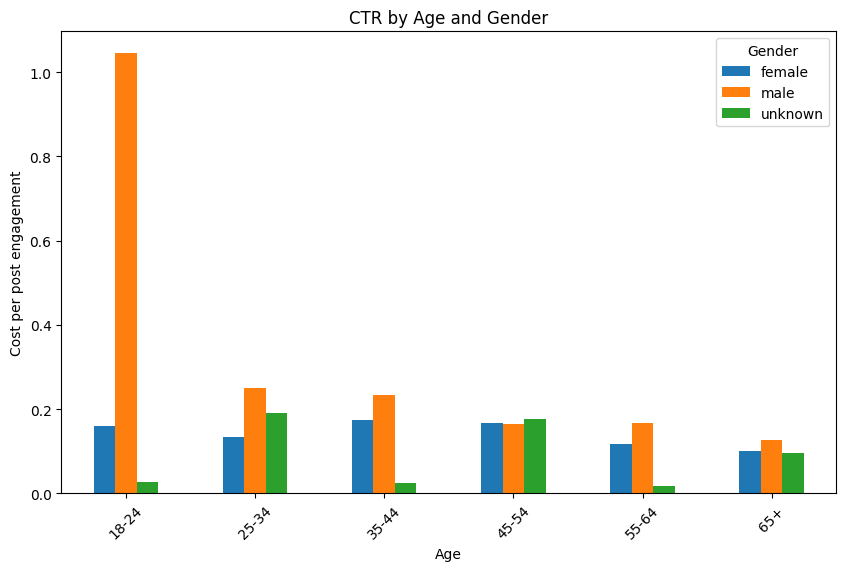

In [80]:
# Group by Age and Gender to calculate mean Cost per Engagement
cost_per_engagement_by_age_gender = df_excl_zero_engagement.groupby(["Age", "Gender"])["Cost per post engagement"].mean().unstack()

# Plot as a bar chart
cost_per_engagement_by_age_gender.plot(kind="bar", figsize=(10, 6))
plt.title("CTR by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Cost per post engagement")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()


The chart shows that males aged 18-24 have significantly higher costs per engagement compared to other demographics, while costs are relatively balanced across genders in older age groups, with slight variations favoring females for cost-efficiency.

### **Ad Frequency Analysis by Age Group**

We ar enow going to analyze the average **ad frequency** across different age groups. Ad frequency refers to the average number of times the same person sees an ad, and understanding its distribution can help identify potential overexposure or underexposure in campaigns targeting specific demographics.

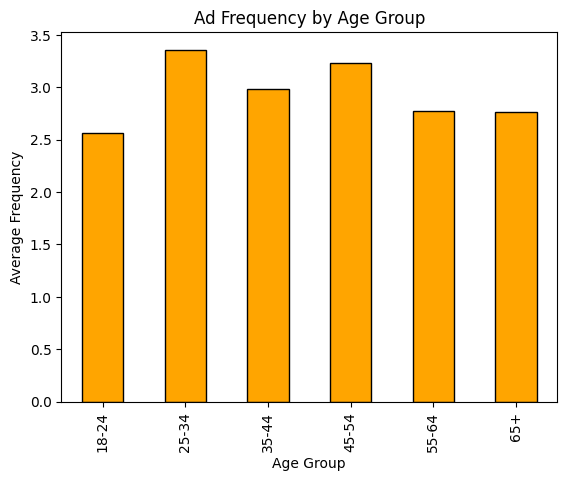

In [11]:
#See how often ads are shown (frequency) across age groups.
frequency_by_age = df.groupby("Age")["Frequency"].mean()
frequency_by_age.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Ad Frequency by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Frequency")
plt.show()

The chart shows that the **25-34** and **45-54** age groups experience the highest average ad frequency, indicating potential overexposure, while the **18-24** group has the lowest exposure,

### **Reach and Impressions Trends by Age Range**

Next, we analyze the average **Reach** and **Impressions** across different age groups to uncover trends in ad delivery performance. This analysis helps assess how effectively campaigns reach audiences of various age ranges and how often ads are displayed to them.

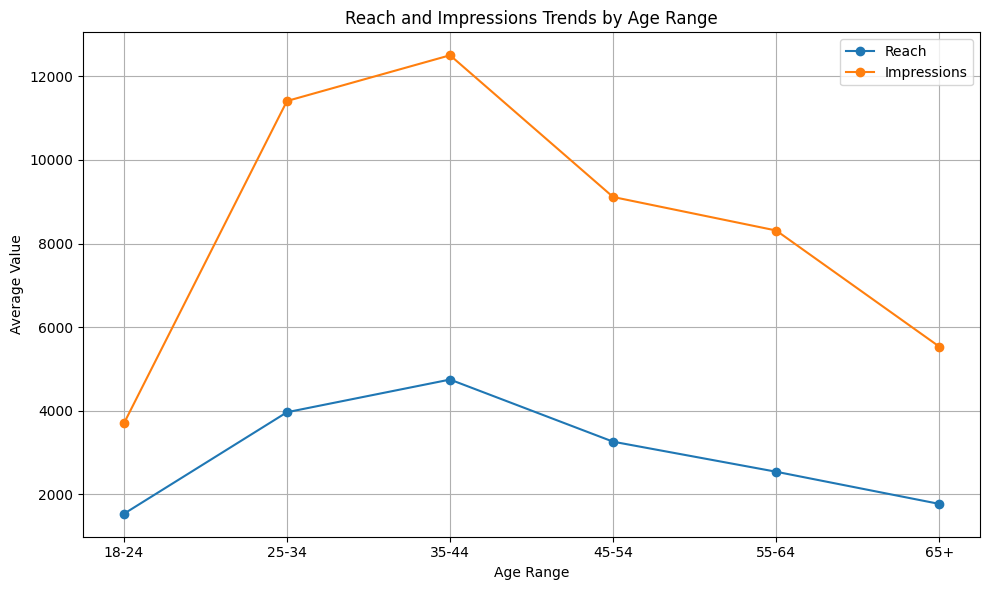

In [77]:
# Group data by Age and calculate mean Reach and Impressions
reach_impressions_by_age = df.groupby("Age")[["Reach", "Impressions"]].mean()

# Plot line chart
reach_impressions_by_age.plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Reach and Impressions Trends by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Average Value")
plt.legend(["Reach", "Impressions"])
plt.grid(True)
plt.tight_layout()
plt.show()

The chart shows that Reach and Impressions peak in the **25-34** age group, gradually declining with older age ranges, indicating that younger demographics are more effectively targeted and exposed to ads.

### **CTR Contribution by Gender**

Let's now visualize how different genders contribute to the overall **Click-Through Rate (CTR)** using a pie chart. This analysis provides a clear breakdown of the relative engagement levels among genders.

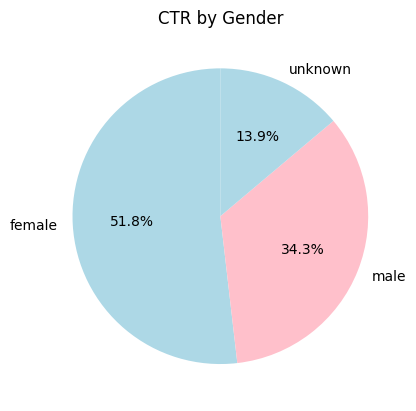

In [14]:
#Show how different genders contribute to overall CTR.
ctr_by_gender = df.groupby("Gender")["CTR (link click-through rate)"].mean()
ctr_by_gender.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["lightblue", "pink"])
plt.title("CTR by Gender")
plt.ylabel("")  # Removes y-axis label
plt.show()

The chart shows that females contribute the highest to the overall CTR at 51.8%, followed by males at 34.3%, while 13.9% of the CTR is from users with an unknown gender.

### **CTR by Call-to-Action (CTA)**

We'll continue by analyzing the **Click-Through Rate (CTR)** based on different **Call-to-Actions (CTAs)**. The goal is to understand which CTAs drive the highest engagement and optimize campaigns accordingly.

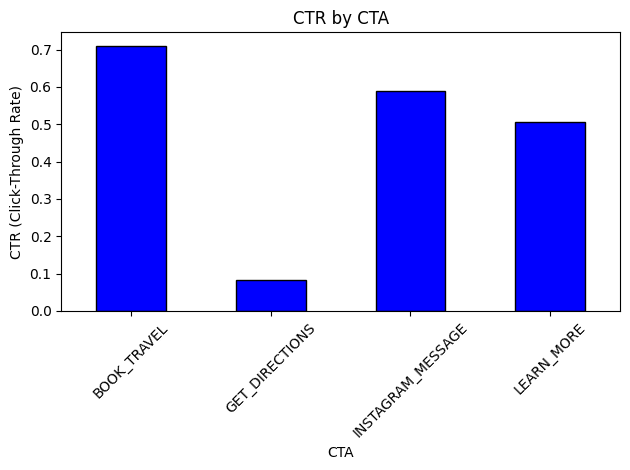

In [83]:
# Group by CTAs and calculate mean CTR
cta_ctr = df.groupby("Call to action")["CTR (link click-through rate)"].mean()
cta_ctr.plot(kind="bar", color="blue", edgecolor="black")
plt.title("CTR by CTA")
plt.xlabel("CTA")
plt.ylabel("CTR (Click-Through Rate)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

The chart shows that "BOOK_TRAVEL" and "INSTAGRAM_MESSAGE" have the highest CTRs, while "GET_DIRECTIONS" significantly underperforms, suggesting a need to optimize or reconsider its use. In the next chart we can also see that the "GET DIRECTIONS" Call to action is the one with the most number of occurrences in the data set, meaning it's the most used accross campaigns. This suggest a change in ads call to actions for one with a higher CTR could benefit the performance.

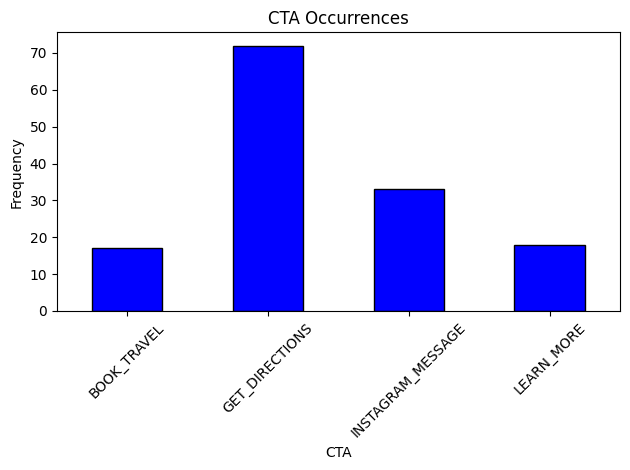

In [84]:
# Group by CTAs and calculate mean CTR
cta_ctr = df.groupby("Call to action")["Call to action"].count()
cta_ctr.plot(kind="bar", color="blue", edgecolor="black")
plt.title("CTA Occurrences")
plt.xlabel("CTA")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

### **Average Cost per Post Engagement by CTA**

Here we analyze the **Cost per Post Engagement** for different **Call-to-Actions (CTAs)**. This helps identify which CTAs are more cost-efficient in driving engagement, providing actionable insights for optimizing ad spend.

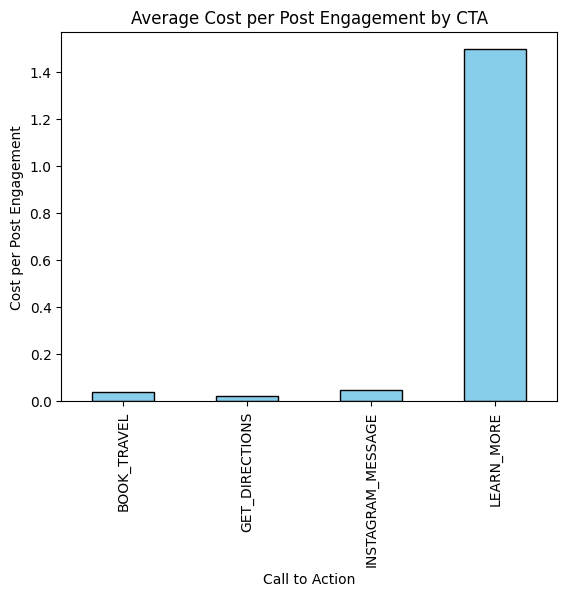

In [16]:
# Group by "Call to action" and calculate the mean for "Cost per post engagement"
cost_per_post_engagements_cta = df_excl_zero_engagement .groupby("Call to action")["Cost per post engagement"].mean()

# Plot the data
cost_per_post_engagements_cta.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Cost per Post Engagement by CTA")
plt.xlabel("Call to Action")
plt.ylabel("Cost per Post Engagement")
plt.show()

The chart shows that "LEARN_MORE" has a significantly higher cost per post engagement compared to other CTAs, suggesting it may require optimization or reconsideration in ad strategies. We also see that the "GET DIRECTIONS" CTA has the lowest Cost per Engagement. However, when we analyze further we can see that whatever engagement it is generating, it is not translating into link clicks. See the next graph.

### **Average Cost per Link Click by CTA**

In this cell, we analyze the **Cost per Link Click** for different **Call-to-Actions (CTAs)** while excluding rows where the cost per link click (`CPC`) is zero. This ensures a focus on CTAs with actual costs, providing more accurate insights into their performance.

In [78]:
#Separating data with no Cost per Link Click
# Rows with no post engagements
df_excl_zero_link_Clicks = df[df["CPC (cost per link click)"] > 0]

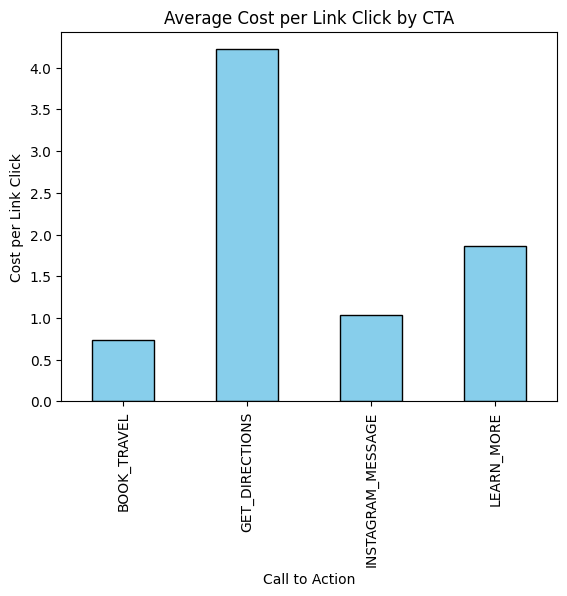

In [79]:
# Group by "Call to action" and calculate the mean for "Cost per link click"
cost_per_link_click_by_cta = df_excl_zero_link_clicks.groupby("Call to action")["CPC (cost per link click)"].mean()

# Plot the data
cost_per_link_click_by_cta .plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Cost per Link Click by CTA")
plt.xlabel("Call to Action")
plt.ylabel("Cost per Link Click")
plt.show()

The chart highlights that "GET_DIRECTIONS" has the highest cost per link click, indicating that while it generates some form of engagement (as seen in the earlier analysis), it fails to translate that engagement into effective link clicks, making it an inefficient CTA for driving actionable outcomes.

### **Relationship Between CPM and Reach**

In this cell, we analyze whether there’s a relationship between **Cost per 1,000 Impressions (CPM)** and **Reach** by visualizing their distribution with a scatter plot. This analysis helps understand how CPM impacts the ability to reach larger audiences.


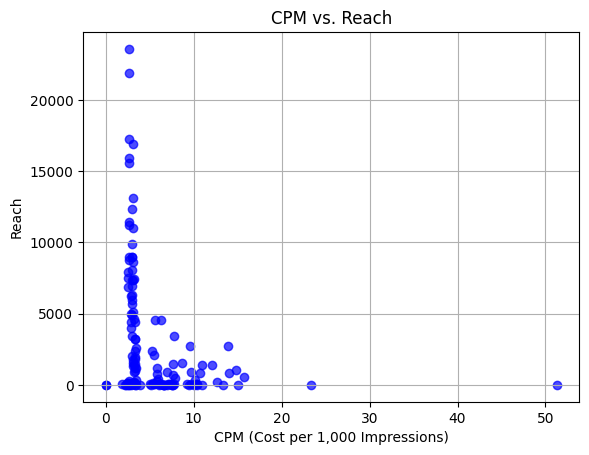

In [39]:
#Understand if there’s a relationship between cost per 1,000 impressions (CPM) and reach.
plt.scatter(df["CPM (cost per 1,000 impressions)"], df["Reach"], color="blue", alpha=0.7)
plt.title("CPM vs. Reach")
plt.xlabel("CPM (Cost per 1,000 Impressions)")
plt.ylabel("Reach")
plt.grid(True)
plt.show()

The chart shows an **inverse relationship between CPM (Cost per 1,000 Impressions) and Reach**, indicating that lower CPM values are associated with significantly higher Reach, while higher CPM values result in diminishing returns on audience Reach. This suggests that increasing the budget may increase Reach, but for campaigns with high CPM, this growth could happen inefficiently, requiring a greater investment to achieve the same level of Reach compared to campaigns with lower CPM.

### **Check for Correlation Between Impressions and Reach**

In this cell, we explore the relationship between **Impressions** and **Reach** using a scatter plot. This visualization helps determine whether higher impressions correlate with greater reach.


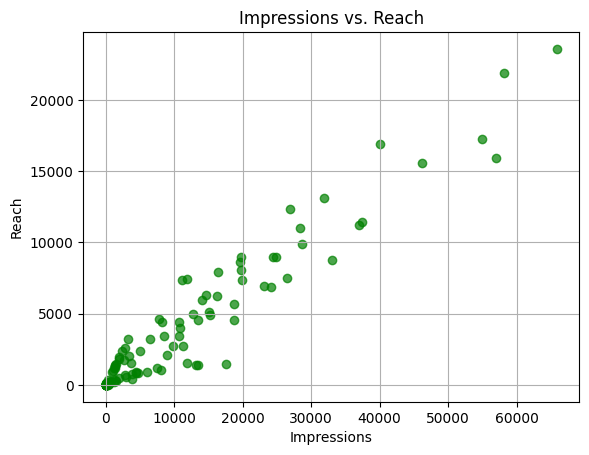

In [21]:
#Check for correlation between impressions and reach
plt.scatter(df["Impressions"], df["Reach"], alpha=0.7, color="green")
plt.title("Impressions vs. Reach")
plt.xlabel("Impressions")
plt.ylabel("Reach")
plt.grid(True)
plt.show()

The scatter plot shows a positive correlation between Impressions and Reach, indicating that as Impressions increase, Reach also tends to increase.

### **Examining Cost Efficiency of Post Engagements**

We'll now look into the relationship between **Cost per Post Engagement** and the number of **Post Engagements** using a scatter plot. This visualization helps assess how efficiently campaigns generate engagements relative to their cost.

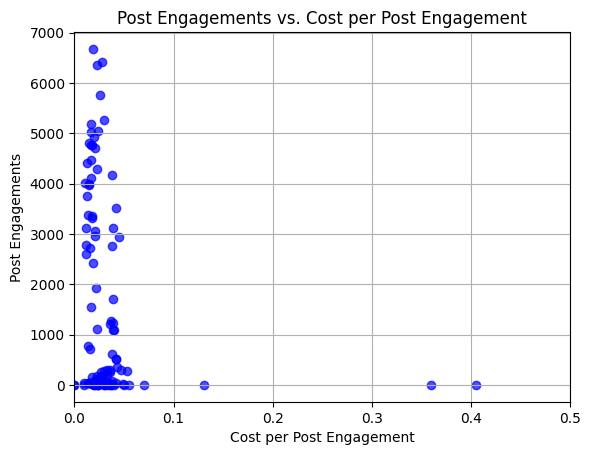

In [42]:
#Examine cost efficiency of post engagements.
plt.scatter(df_excl_zero_engagement["Cost per post engagement"], df_excl_zero_engagement["Post engagements"], alpha=0.7, color="blue")
plt.title("Post Engagements vs. Cost per Post Engagement")
plt.xlabel("Cost per Post Engagement")
plt.ylabel("Post Engagements")
plt.grid(True)
plt.xlim(0, .5)
plt.show()

The chart shows that campaigns with a lower Cost per Post Engagement tend to generate significantly higher Post Engagements, while higher costs result in diminishing engagement, indicating strong cost-efficiency for low-cost campaigns.

### **Exploring the Relationship Between CTR and CPC**

Let's proceed to explore whether higher **Click-Through Rates (CTR)** correlate with lower **Cost per Link Click (CPC)** by visualizing the relationship with a scatter plot and regression line. This analysis helps determine if improving CTR leads to better cost efficiency.

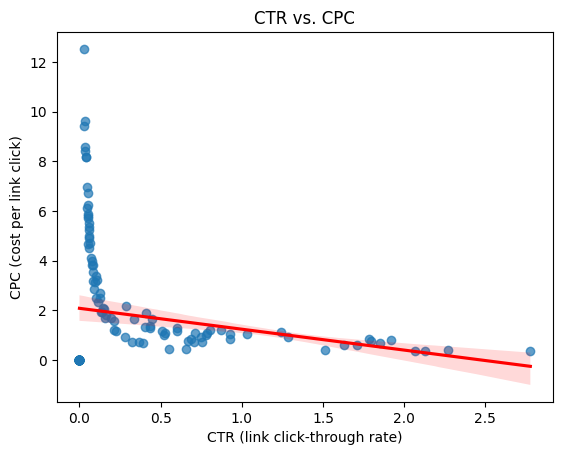

In [41]:
#Explore if higher CTR correlates with lower CPC.
sns.regplot(x="CTR (link click-through rate)", y="CPC (cost per link click)", data=df, scatter_kws={"alpha":0.7}, line_kws={"color":"red"})
plt.title("CTR vs. CPC")
plt.xlabel("CTR (link click-through rate)")
plt.ylabel("CPC (cost per link click)")
plt.show()


The scatter plot with the regression line indicates a negative correlation between CTR (Click-Through Rate) and CPC (Cost per Link Click), suggesting that as CTR increases, CPC tends to decrease. This aligns with the idea that better-performing campaigns (higher CTR) are more cost-efficient in driving link clicks.

### **Conclusions and Insights from Visualizations**

This analysis provided valuable insights into campaign performance across various metrics, demographics, and ad strategies. Below are the summarized conclusions from each visualization:

---

#### **Demographic Insights**:
1. **CTR by Age and Gender**:
   - Females consistently exhibit the highest CTR across all age groups.
   - The 65+ demographic shows the most significant engagement, particularly among females, while males and unknown genders show lower engagement rates overall.

2. **Cost per Post Engagement by Age and Gender**:
   - Males aged 18-24 have notably higher costs per engagement compared to other demographics.
   - Costs become more balanced across genders in older age groups, with females often showing slightly better cost-efficiency.

3. **Ad Frequency by Age Group**:
   - The 25-34 and 45-54 age groups experience the highest average ad frequency, indicating potential overexposure and ad fatigue in these demographics.
   - The 18-24 age group sees the lowest exposure, suggesting room for more targeting efforts.

4. **Reach and Impressions Trends by Age Range**:
   - Reach and Impressions peak in the 25-34 age group, gradually declining with older age ranges.
   - Younger demographics are more effectively targeted and exposed to ads, indicating they are a primary focus of current campaigns.

5. **CTR by Gender**:
   - Females contribute the most to overall CTR at 51.8%, followed by males at 34.3%.
   - Users with an unknown gender account for 13.9% of the CTR, suggesting some data limitations in demographic attribution.

---

#### **Campaign Cost Efficiency**:
6. **Post Engagements vs. Cost per Post Engagement**:
   - Campaigns with lower Cost per Post Engagement generate significantly higher engagements.
   - Higher costs result in diminishing returns on engagement, highlighting the need for cost-efficient targeting.

7. **CTR vs. CPC**:
   - A negative correlation between CTR and CPC suggests that improving CTR can lead to lower costs per click, making campaigns more cost-efficient.

8. **CPM vs. Reach**:
   - An inverse relationship exists between CPM and Reach, indicating that campaigns with lower CPM values achieve significantly higher Reach.
   - Campaigns with high CPM may struggle to expand reach efficiently, requiring optimization.

---

#### **Ad Strategy Effectiveness**:
9. **CTR by CTA**:
   - CTAs like "BOOK_TRAVEL" and "INSTAGRAM_MESSAGE" yield the highest CTR, indicating strong engagement.
   - "GET_DIRECTIONS" performs poorly in driving clicks, highlighting the need to reassess its use in campaigns.

10. **Cost per Post Engagement by CTA**:
   - "LEARN_MORE" incurs the highest Cost per Post Engagement, suggesting inefficiencies.
   - "GET_DIRECTIONS" has the lowest cost per engagement, but this does not translate into link clicks, signaling a disconnect between engagement and actionable outcomes.

11. **Cost per Link Click by CTA**:
   - "GET_DIRECTIONS" incurs the highest Cost per Link Click, reinforcing its inefficiency in driving meaningful engagement or actions.
   - Other CTAs like "BOOK_TRAVEL" and "INSTAGRAM_MESSAGE" show better cost-efficiency for driving clicks.

---

#### **Efficiency of Ad Delivery**:
12. **Impressions vs. Reach**:
   - A positive correlation between Impressions and Reach demonstrates that higher impressions generally result in greater reach.

---

### **Overall Recommendations**:
- **Targeting**:
  - Focus on the 65+ demographic for cost-efficient engagement, particularly among females.
  - Reduce ad frequency for the 25-34 and 45-54 age groups to prevent overexposure and improve cost efficiency.

- **CTA Optimization**:
  - Reassess the "GET_DIRECTIONS" CTA, as it shows poor performance both in CTR and cost-efficiency for link clicks.
  - Allocate more resources to high-performing CTAs like "BOOK_TRAVEL" and "INSTAGRAM_MESSAGE."

- **Cost Efficiency**:
  - Prioritize campaigns with lower CPM and CPC to maximize reach and engagement while minimizing costs.
  - Investigate campaigns with high costs but low outcomes to identify and address inefficiencies.

- **Demographic Focus**:
  - Continue leveraging females as a key demographic for higher CTR and cost-efficient engagement.
  - Maintain a strong focus on the 65+ demographic, particularly females, for cost-efficient engagement.
  - The 18-24 age group currently has the lowest ad exposure. Expanding targeting efforts toward this demographic could increase engagement opportunities and better utilize their untapped potential.

These findings provide actionable insights to refine ad strategies, optimize costs, and improve overall campaign performance.
